In [135]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [136]:
data_path = 'houses.csv'
df = pd.read_csv(data_path)

In [137]:
df.head()

,Unnamed: 0,piscina,apartamento,gas,amueblado,patio,nauta,cisterna,finca,portal,techo de placa,hospital,escuela,carro,terraza,cuartos,banos,salas,plantas,cocinas,comedores,desahogos,pisos,splits,refrigeradores,garajes,tanques,Alquízar,Arroyo Naranjo,Artemisa,Bahía Honda,Baracoa,Batabanó,Bauta,Bayamo,Bejucal,Boyeros,Caibarién,Caimito,Camagüey,Candelaria,Centro Habana,Cerro,Ciego de Ávila,Cienfuegos,Cifuentes,Colombia,Colón,Consolación del Sur,Contramaestre,Corralillo,Cotorro,Cárdenas,Diez de Octubre,Florida,Frank País,Guanabacoa,Guanajay,Guane,Guantánamo,Güines,Güira de Melena,Habana Vieja,Habana del Este,Holguín,Isla de La Juventud,Jagüey Grande,Jaruco,Jovellanos,La Lisa,Las Tunas,Los Palacios,Majagua,Manicaragua,Mantua,Manzanillo,Marianao,Mariel,Matanzas,Mayarí,Melena del Sur,Minas,Morón,Nuevitas,Palma Soriano,Pinar del Río,Playa,Plaza,Primero de Enero,Quivicán,Rafael Freyre,Regla,Sagua de Tánamo,Sagua la Grande,San Antonio de los Baños,San Cristóbal,San José de las Lajas,San Luis,San Miguel del Padrón,Sancti Spíritus,Santa Clara,Santa Cruz del Norte,Santiago de Cuba,Santo Domingo,Songo la Maya,Trinidad,Viñales,Yara,Artemisa,Camagüey,Ciego de Ávila,Cienfuegos,Granma,Guantánamo,Holguín,Isla de la Juventud,La Habana,Las Tunas,Matanzas,Mayabeque,Pinar del Río,Sancti Spíritus,Santiago de Cuba,Villa Clara,price
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,3,2,0,2,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,49999.0
1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,2,1,2,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13000.0
2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,15000.0
3,3,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2,2,0,2,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,35000.0
4,4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,5,4,0,2,2,0,0,0,7,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,600000.0


In [138]:
df.describe()

,Unnamed: 0,piscina,apartamento,gas,amueblado,patio,nauta,cisterna,finca,portal,techo de placa,hospital,escuela,carro,terraza,cuartos,banos,salas,plantas,cocinas,comedores,desahogos,pisos,splits,refrigeradores,garajes,tanques,Alquízar,Arroyo Naranjo,Artemisa,Bahía Honda,Baracoa,Batabanó,Bauta,Bayamo,Bejucal,Boyeros,Caibarién,Caimito,Camagüey,Candelaria,Centro Habana,Cerro,Ciego de Ávila,Cienfuegos,Cifuentes,Colombia,Colón,Consolación del Sur,Contramaestre,Corralillo,Cotorro,Cárdenas,Diez de Octubre,Florida,Frank País,Guanabacoa,Guanajay,Guane,Guantánamo,Güines,Güira de Melena,Habana Vieja,Habana del Este,Holguín,Isla de La Juventud,Jagüey Grande,Jaruco,Jovellanos,La Lisa,Las Tunas,Los Palacios,Majagua,Manicaragua,Mantua,Manzanillo,Marianao,Mariel,Matanzas,Mayarí,Melena del Sur,Minas,Morón,Nuevitas,Palma Soriano,Pinar del Río,Playa,Plaza,Primero de Enero,Quivicán,Rafael Freyre,Regla,Sagua de Tánamo,Sagua la Grande,San Antonio de los Baños,San Cristóbal,San José de las Lajas,San Luis,San Miguel del Padrón,Sancti Spíritus,Santa Clara,Santa Cruz del Norte,Santiago de Cuba,Santo Domingo,Songo la Maya,Trinidad,Viñales,Yara,Artemisa,Camagüey,Ciego de Ávila,Cienfuegos,Granma,Guantánamo,Holguín,Isla de la Juventud,La Habana,Las Tunas,Matanzas,Mayabeque,Pinar del Río,Sancti Spíritus,Santiago de Cuba,Villa Clara,price
count,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.0,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.00000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.0,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.00000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6296.000000,6.296000e+03
mean,3147.500000,0.027001,0.340375,0.999206,0.031131,0.439803,0.001747,0.187579,0.009530,0.277319,0.0,0.058291,0.027001,0.018901,0.265407,2.275254,2.089898,0.109911,2.014930,2.024142,0.036690,0.223952,0.05702,0.098158,0.042249,0.028590,2.009689,0.000159,0.046855,0.003177,0.000159,0.000476,0.000476,0.005877,0.000476,0.002065,0.068297,0.000318,0.001906,0.003177,0.000159,0.077033,0.050985,0.000635,0.001747,0.0,0.000159,0.000794,0.000635,0.000159,0.000159,0.016677,0.005877,0.133895,0.000318,0.000159,0.019536,0.001588,0.000635,0.000953,0.001588,0.000953,0.034625,0.063850,0.002541,0.001429,0.000159,0.000318,0.000318,0.038914,0.001747,0.000318,0.000159,0.000159,0.000159,0.000318,0.048443,0.000794,0.003812,0.000318,0.000159,0.000159,0.000476,0.000318,0.000635,0.002859,0.137230,0.135165,0.000159,0.000318,0.000318,0.010959,0.000159,0.000635,0.002224,0.000794,0.002859,0.000159,0.044155,0.001112,0.004288,0.000476,0.006036,0.000159,0.000159,0.000635,0.000635,0.000318,0.017789,0.003971,0.001429,0.001747,0.001112,0.001429,0.003494,0.001429,0.92662,0.001906,0.010959,0.008259,0.005241,0.001747,0.007147,0.005718,8.875851e+06
std,1817.642979,0.162100,0.473873,0.028172,0.173685

In [139]:
df.columns

Index(['Unnamed: 0', 'piscina', 'apartamento', 'gas', 'amueblado', 'patio',
       'nauta', 'cisterna', 'finca', 'portal',
       ...
       ' Isla de la Juventud', ' La Habana', ' Las Tunas', ' Matanzas',
       ' Mayabeque', ' Pinar del Río', ' Sancti Spíritus', ' Santiago de Cuba',
       ' Villa Clara', 'price'],
      dtype='object', length=125)

In [140]:
# borrar la columna 'Unnamed: 0'
del df['Unnamed: 0']

In [141]:
df.columns

Index(['piscina', 'apartamento', 'gas', 'amueblado', 'patio', 'nauta',
       'cisterna', 'finca', 'portal', 'techo de placa',
       ...
       ' Isla de la Juventud', ' La Habana', ' Las Tunas', ' Matanzas',
       ' Mayabeque', ' Pinar del Río', ' Sancti Spíritus', ' Santiago de Cuba',
       ' Villa Clara', 'price'],
      dtype='object', length=124)

In [142]:
# Revisar si hay valores nulos
print("Valores nulos: \n")
print(df.isnull().sum())

Valores nulos: 

piscina              0
apartamento          0
gas                  0
amueblado            0
patio                0
                    ..
 Pinar del Río       0
 Sancti Spíritus     0
 Santiago de Cuba    0
 Villa Clara         0
price                0
Length: 124, dtype: int64


In [143]:
# Lista de todas las provincias de Cuba
provincias = [
    'Pinar del Río', 'Artemisa', ' La Habana', ' Mayabeque', 'Matanzas',
    'Cienfuegos', ' Villa Clara', 'Sancti Spíritus', 'Ciego de Ávila',
    'Camagüey', 'Las Tunas', 'Holguín', ' Granma', 'Santiago de Cuba',
    'Guantánamo', ' Isla de la Juventud'
]



# Identificar las columnas en el DataFrame que no son provincias para mantenerlas
columnas_no_provincias = [col for col in df.columns if col not in provincias]

# Realizar el "melt" del DataFrame
df_melted = df.melt(id_vars=columnas_no_provincias, value_vars=provincias, var_name='Provincias', value_name='presente')

# Filtrar las filas donde la provincia está presente (valor == 1)
df_filtrado = df_melted[df_melted['presente'] == 1]

# Eliminar la columna 'presente' ya que ya no es necesaria
df_final = df_filtrado.drop('presente', axis=1)


In [144]:
df_final.describe()

,piscina,apartamento,gas,amueblado,patio,nauta,cisterna,finca,portal,techo de placa,hospital,escuela,carro,terraza,cuartos,banos,salas,plantas,cocinas,comedores,desahogos,pisos,splits,refrigeradores,garajes,tanques,Alquízar,Arroyo Naranjo,Bahía Honda,Baracoa,Batabanó,Bauta,Bayamo,Bejucal,Boyeros,Caibarién,Caimito,Candelaria,Centro Habana,Cerro,Cifuentes,Colombia,Colón,Consolación del Sur,Contramaestre,Corralillo,Cotorro,Cárdenas,Diez de Octubre,Florida,Frank País,Guanabacoa,Guanajay,Guane,Güines,Güira de Melena,Habana Vieja,Habana del Este,Isla de La Juventud,Jagüey Grande,Jaruco,Jovellanos,La Lisa,Los Palacios,Majagua,Manicaragua,Mantua,Manzanillo,Marianao,Mariel,Mayarí,Melena del Sur,Minas,Morón,Nuevitas,Palma Soriano,Playa,Plaza,Primero de Enero,Quivicán,Rafael Freyre,Regla,Sagua de Tánamo,Sagua la Grande,San Antonio de los Baños,San Cristóbal,San José de las Lajas,San Luis,San Miguel del Padrón,Santa Clara,Santa Cruz del Norte,Santo Domingo,Songo la Maya,Trinidad,Viñales,Yara,Artemisa,Camagüey,Ciego de Ávila,Cienfuegos,Guantánamo,Holguín,Las Tunas,Matanzas,Pinar del Río,Sancti Spíritus,Santiago de Cuba,price
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.0,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.0,6113.000000,6113.0,6113.0,6113.000000,6113.0,6113.000000,6113.000000,6113.000000,6113.000000,6113.0,6113.0,6113.000000,6113.000000,6113.0,6113.0,6113.0,6113.0,6113.0,6113.000000,6113.000000,6113.0,6113.000000,6113.0,6113.0,6113.000000,6113.0,6113.0,6113.000000,6113.0,6113.000000,6113.000000,6113.000000,6113.0,6113.000000,6113.0,6113.000000,6113.0,6113.0,6113.000000,6113.0,6113.000000,6113.000000,6113.0,6113.0,6113.000000,6113.0,6113.0,6113.0,6113.0,6113.000000,6113.000000,6113.0,6113.000000,6113.0,6113.000000,6113.0,6113.000000,6113.0,6113.0,6113.000000,6113.0,6113.000000,6113.000000,6113.000000,6113.000000,6113.0,6113.0,6113.0,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6.113000e+03
mean,0.026992,0.339113,0.999182,0.031899,0.438737,0.001799,0.188451,0.009815,0.278096,0.0,0.059054,0.027482,0.019140,0.265500,2.275969,2.090790,0.108294,2.014232,2.023556,0.036970,0.224767,0.056764,0.097661,0.040896,0.028955,2.009815,0.0,0.048258,0.0,0.0,0.000491,0.0,0.000491,0.002127,0.070342,0.000327,0.0,0.0,0.079339,0.052511,0.0,0.0,0.0,0.0,0.0,0.000164,0.017177,0.0,0.137903,0.0,0.0,0.020121,0.0,0.0,0.001636,0.0,0.035662,0.065761,0.001472,0.0,0.000327,0.0,0.040079,0.0,0.0,0.000164,0.0,0.000327,0.049894,0.0,0.0,0.000164,0.0,0.0,0.0,0.0,0.141338,0.139212,0.0,0.000327,0.0,0.011287,0.0,0.000654,0.0,0.0,0.002945,0.0,0.045477,0.004417,0.000491,0.000164,0.0,0.0,0.0,0.000327,0.003272,0.003272,0.000654,0.001799,0.000982,0.002617,0.001799,0.003926,0.002945,0.001145,0.006216,9.140431e+06
std,0.162072,0.473447,0.028590,0.175746,0.496273,0.042385,0.391104,0.098592,0.448098,0.0,0.235746,0.163498,0.137027,0.441635,0.900974,0.461653,0.544834,0.167638,0.258560,0.327524,0.919642,0.417489,0.488864,0.319465,0.255142,0.311066,0.0,0.214328,0.0,0.0,0.022149,0.0,0.022149,0.046070,0.255743,0.018086,0.0,0.0,0.270289,0.223073,0.0,0.0,0.0,0.0,0.0,0.012790,0.129939,0.0,0.344826,0.0,0.0,0.140426,0.0,0.0,0.040416,0.0,0.185460,0.247885,0.038345,0.0,0.018086,0.0,0.196159,0.0,0.0,0.012790,0.0,0.018086,0.217743,0.0,0.0,0.012790,0.0,0.0,0.0,0.0,0.348399,0.346195,0.0,0.018086,0.0,0.105650,0.0,0.025574,0.0,0.0,0.054188,0.0,0.208365,0.066318,0.022149,0.012790,0.0,0.0,0.0,0.018086,0.057110,0.057110,0.025574,0.042385,0.031316,0.051097,0.042385,0.062540,0.054188,0.033823,0.078604,7.105588e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0000

In [145]:
# Parte 2: Procesar los Municipios

# Lista de todos los municipios de tu DataFrame, basada en tu input
municipios = [
    "Alquízar", "Arroyo Naranjo", "Bahía Honda", "Baracoa", "Batabanó", 
    "Bauta", "Bayamo", "Bejucal", "Boyeros", "Caibarién", "Caimito", "Candelaria", 
    "Centro Habana", "Cerro", "Cifuentes", "Colombia", "Colón", "Consolación del Sur", 
    "Contramaestre", "Corralillo", "Cotorro", "Cárdenas", "Diez de Octubre", "Florida", 
    "Frank País", "Guanabacoa", "Guanajay", "Guane", "Güines", "Güira de Melena", 
    "Habana Vieja", "Habana del Este", "Jagüey Grande", "Jaruco", "Jovellanos", 
    "La Lisa", "Los Palacios", "Majagua", "Manicaragua", "Mantua", "Manzanillo", 
    "Marianao", "Mariel", "Mayarí", "Melena del Sur", "Minas", "Morón", "Nuevitas", 
    "Palma Soriano", "Playa", "Plaza", "Primero de Enero", "Quivicán", "Rafael Freyre", 
    "Regla", "Sagua de Tánamo", "Sagua la Grande", "San Antonio de los Baños", 
    "San Cristóbal", "San José de las Lajas", "San Luis", "San Miguel del Padrón", 
    "Santa Clara", "Santa Cruz del Norte", "Santo Domingo", "Songo la Maya", "Trinidad", 
    "Viñales", "Yara",'Isla de La Juventud', ' Artemisa', ' Camagüey',
       ' Ciego de Ávila', ' Cienfuegos', ' Guantánamo', ' Holguín',
       ' Las Tunas', ' Matanzas', ' Pinar del Río', ' Sancti Spíritus',
       ' Santiago de Cuba'
]

# Identificar las columnas en el DataFrame que no son provincias para mantenerlas
columnas_no_municipios = [col for col in df_final.columns if col not in municipios]

# Realizar el "melt" del DataFrame
df_melted = df_final.melt(id_vars=columnas_no_municipios, value_vars=municipios, var_name='Municipios', value_name='presente')

# Filtrar las filas donde la provincia está presente (valor == 1)
df_filtrado = df_melted[df_melted['presente'] == 1]

# Eliminar la columna 'presente' ya que ya no es necesaria
df_final = df_filtrado.drop('presente', axis=1)



In [146]:
df_final.describe()

,piscina,apartamento,gas,amueblado,patio,nauta,cisterna,finca,portal,techo de placa,hospital,escuela,carro,terraza,cuartos,banos,salas,plantas,cocinas,comedores,desahogos,pisos,splits,refrigeradores,garajes,tanques,price
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.0,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6.113000e+03
mean,0.026992,0.339113,0.999182,0.031899,0.438737,0.001799,0.188451,0.009815,0.278096,0.0,0.059054,0.027482,0.019140,0.265500,2.275969,2.090790,0.108294,2.014232,2.023556,0.036970,0.224767,0.056764,0.097661,0.040896,0.028955,2.009815,9.140431e+06
std,0.162072,0.473447,0.028590,0.175746,0.496273,0.042385,0.391104,0.098592,0.448098,0.0,0.235746,0.163498,0.137027,0.441635,0.900974,0.461653,0.544834,0.167638,0.258560,0.327524,0.919642,0.417489,0.488864,0.319465,0.255142,0.311066,7.105588e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+03
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.200000e+04
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.100000e+04
75%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.200000e+04
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,5.000000,8.000000,4.000000,4.000000,4.000000,6.000000,7.000000,5.000000,6.000000,7.000000,5.555556e+10


In [147]:
df_final.columns

Index(['piscina', 'apartamento', 'gas', 'amueblado', 'patio', 'nauta',
       'cisterna', 'finca', 'portal', 'techo de placa', 'hospital', 'escuela',
       'carro', 'terraza', 'cuartos', 'banos', 'salas', 'plantas', 'cocinas',
       'comedores', 'desahogos', 'pisos', 'splits', 'refrigeradores',
       'garajes', 'tanques', 'price', 'Provincias', 'Municipios'],
      dtype='object')

In [148]:
df_final.drop(['techo de placa'], axis=1, inplace=True)

In [149]:
df_final.to_csv('houses_clean.csv', index=False)
df=df_final
df= df[(df['price'] <= 300000) ]

In [150]:
precio_promedio_provincia = df.groupby('Provincias')['price'].mean()
precio_promedio_municipio = df.groupby(['Provincias', 'Municipios'])['price'].mean()
precio_promedio_provincia

Provincias
 Granma                 15714.285714
 Isla de la Juventud    11555.555556
 La Habana              36305.116488
 Mayabeque              19778.846154
 Villa Clara            23652.777778
Artemisa                27125.000000
Camagüey                22255.000000
Ciego de Ávila          26125.000000
Cienfuegos              65727.272727
Guantánamo              18375.000000
Holguín                 20500.000000
Las Tunas               10363.636364
Matanzas                45954.545455
Pinar del Río           30194.444444
Sancti Spíritus         25714.285714
Santiago de Cuba        40118.421053
Name: price, dtype: float64

In [152]:
conteo_caracteristicas = df[['piscina', 'apartamento', 'amueblado', 'patio', 'nauta', 'cisterna', 'finca', 'portal',  'hospital', 'escuela', 'carro', 'terraza']].apply(pd.value_counts)
conteo_caracteristicas

,piscina,apartamento,amueblado,patio,nauta,cisterna,finca,portal,hospital,escuela,carro,terraza
0,5869,3986,5841,3382,6020,4895,5973,4355,5674,5865,5916,4430
1,162,2045,190,2649,11,1136,58,1676,357,166,115,1601


In [153]:
correlacion_precio_caracteristicas = df.corr()['price']
correlacion_precio_caracteristicas

C:\Users\leona\AppData\Local\Temp\ipykernel_424\136595027.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_precio_caracteristicas = df.corr()['price']


piscina          -0.006770
apartamento      -0.008162
gas               0.007323
amueblado         0.033573
patio             0.017393
nauta             0.018334
cisterna          0.025468
finca            -0.010680
portal            0.000351
hospital         -0.009967
escuela          -0.018059
carro             0.003278
terraza           0.006582
cuartos           0.016254
banos             0.017565
salas             0.001902
plantas          -0.009744
cocinas          -0.012904
comedores         0.014023
desahogos        -0.003772
pisos            -0.007696
splits            0.029667
refrigeradores    0.005859
garajes           0.001908
tanques           0.000935
price             1.000000
Name: price, dtype: float64

C:\Users\leona\AppData\Local\Temp\ipykernel_424\425953126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


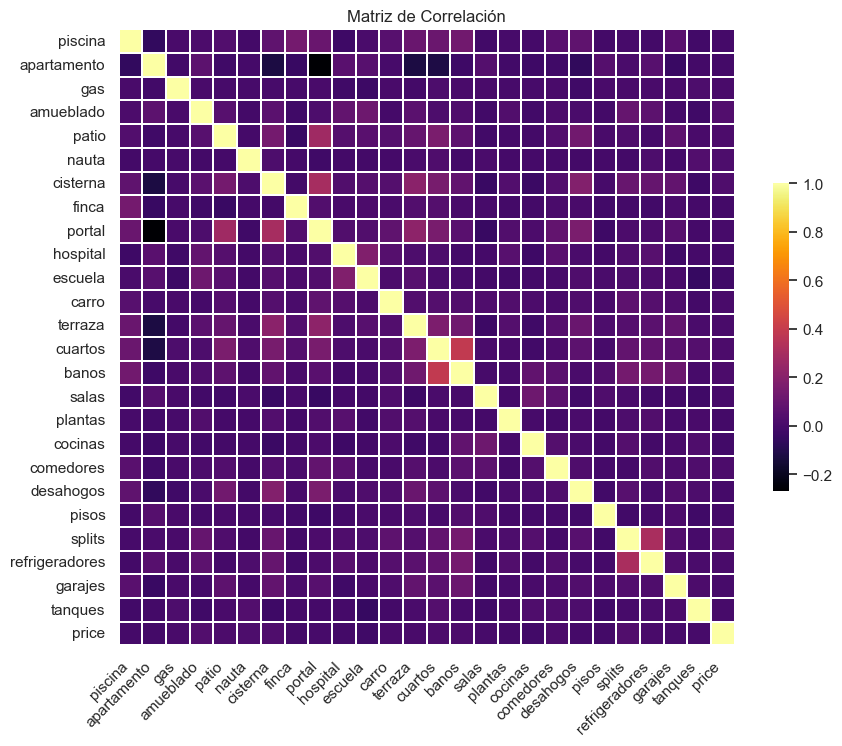

In [154]:
corr = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un heatmap para visualizar la matriz de correlación
# 'annot=True' muestra los valores de correlación en los cuadros
# 'cmap' define el mapa de colores utilizado para codificar los valores de correlación
sns.heatmap(corr, fmt=".2f", cmap='inferno', square=True, linewidths=.05, cbar_kws={"shrink": .5})

# Ajustar los ticks y labels para que sean legibles
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Título opcional
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [155]:
## Compute Basic Statistical Estimators

print("Basic Statistical Estimators of a Dataset row")
# Mean
means = df['price'].mean()
print("Means:\n", means)

# Standard Deviation
std_devs = df['price'].std()
print("Standard Deviations:\n", std_devs)

# Variance
variances = df['price'].var()
print("Variances:\n", variances)

Basic Statistical Estimators of a Dataset row
Means:
 35917.756635715465
Standard Deviations:
 42163.20811824252
Variances:
 1777736118.8222315


          piscina  apartamento         gas   amueblado       patio  nauta  \
count  603.000000   603.000000  603.000000  603.000000  603.000000  603.0   
mean     0.024876     0.366501    0.998342    0.043118    0.461028    0.0   
std      0.155875     0.482249    0.040723    0.203291    0.498893    0.0   
min      0.000000     0.000000    0.000000    0.000000    0.000000    0.0   
25%      0.000000     0.000000    1.000000    0.000000    0.000000    0.0   
50%      0.000000     0.000000    1.000000    0.000000    0.000000    0.0   
75%      0.000000     1.000000    1.000000    0.000000    1.000000    0.0   
max      1.000000     1.000000    1.000000    1.000000    1.000000    0.0   

         cisterna       finca      portal    hospital     escuela       carro  \
count  603.000000  603.000000  603.000000  603.000000  603.000000  603.000000   
mean     0.182421    0.004975    0.263682    0.076285    0.033167    0.016584   
std      0.386512    0.070417    0.440994    0.265674    0.1792

C:\Users\leona\AppData\Local\Temp\ipykernel_424\4110791672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('float32')


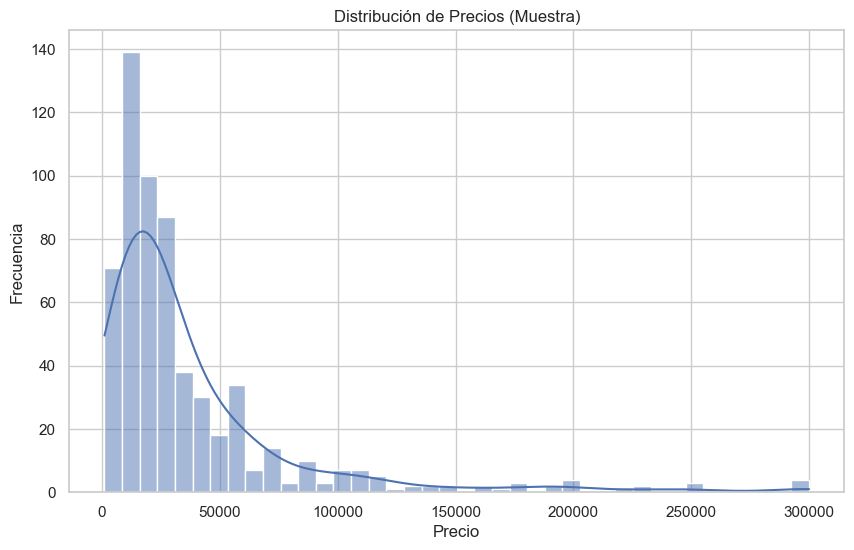

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes para visualización y eficiencia
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Optimización de tipos de datos
# Reemplaza 'int64' por 'int8' o 'float64' por 'float32' donde sea posible
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('float32')

# Análisis exploratorio de datos (EDA) sobre una muestra
df_sample = df.sample(frac=0.1)

# Estadísticas descriptivas de la muestra
print(df_sample.describe())

# Visualización de la distribución de precios en la muestra
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['price'], kde=True)
plt.title('Distribución de Precios (Muestra)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


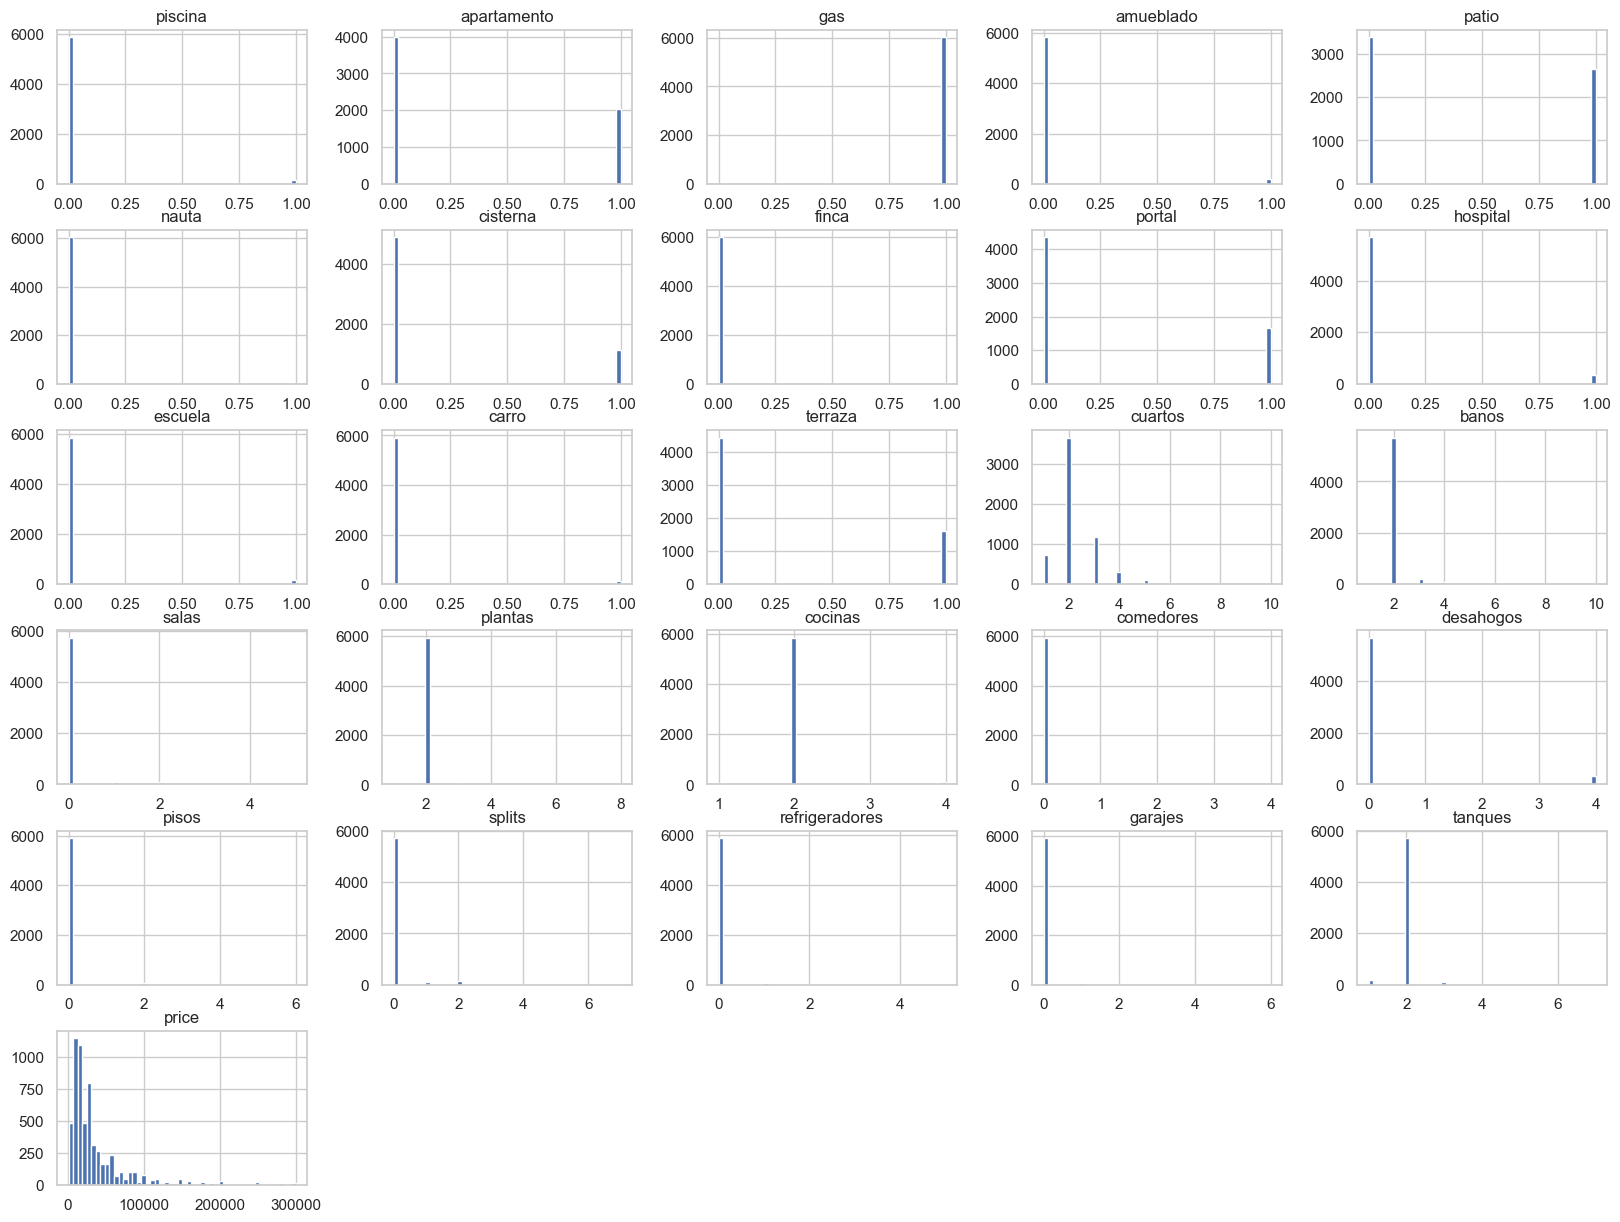

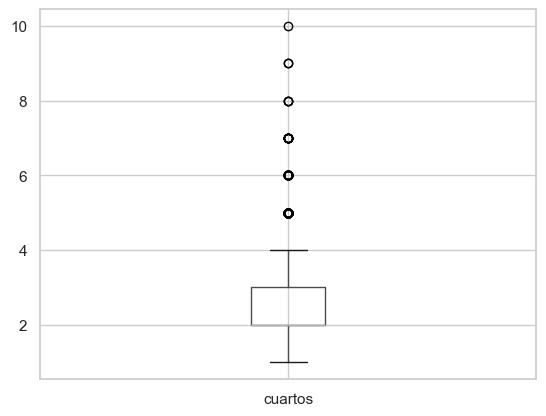

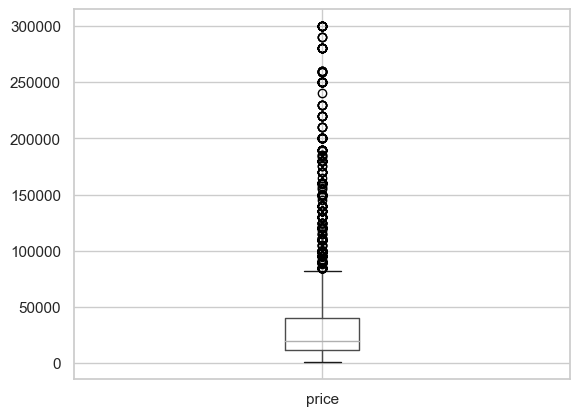

In [157]:
# Plot histograms for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()

# Box plots to identify outliers
for column in ['cuartos','price']:
    plt.figure()
    df.boxplot([column], figsize=(10,10))


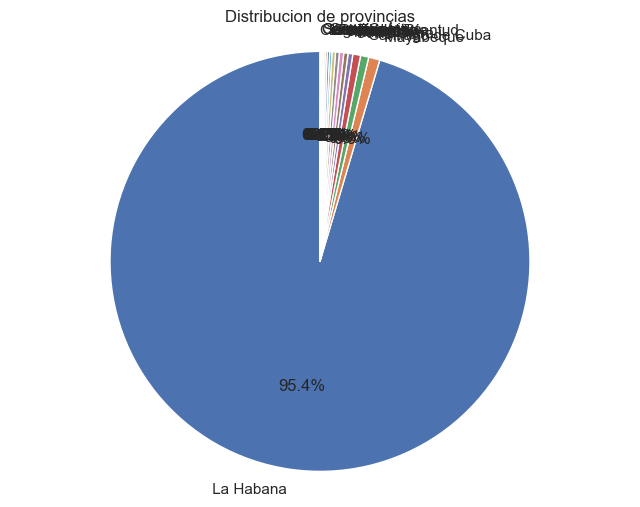

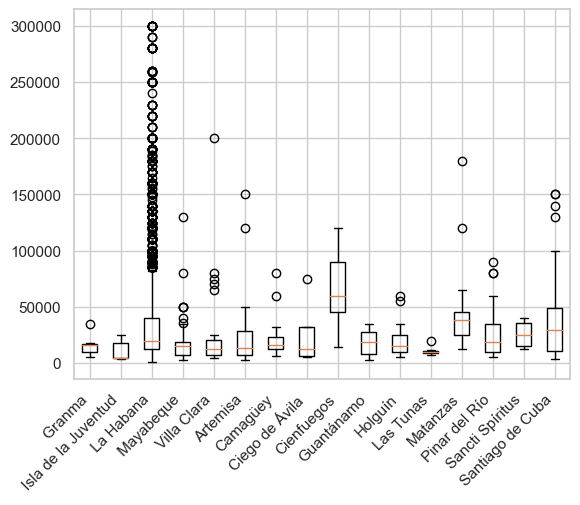

In [158]:

genre_count = df['Provincias'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Optional: Specify the figure size
plt.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de provincias')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plot grouped box plots
grouped = df.groupby('Provincias')
imdb_ratings = [group['price'] for _, group in grouped]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(imdb_ratings)
ax.set_xticklabels([name for name, _ in grouped], rotation=45, ha="right")
plt.show()